In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [2]:
def count_images_in_folder(folder):
    counts = {}
    for subdir in os.listdir(folder):
        count = len([f for f in os.listdir(os.path.join(folder, subdir))])
        counts[subdir] = count
    return counts

In [3]:
folder = "../../dataset/Plant_leave_diseases_dataset_without_augmentation"
data = count_images_in_folder(folder)

In [4]:
print(data)

{'Soybean___healthy': 5090, 'Peach___healthy': 360, 'Strawberry___healthy': 456, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 513, 'Tomato___Tomato_mosaic_virus': 373, 'Pepper,_bell___Bacterial_spot': 997, 'Potato___healthy': 152, 'Cherry___healthy': 854, 'Tomato___Septoria_leaf_spot': 1771, 'Corn___Northern_Leaf_Blight': 985, 'Tomato___Leaf_Mold': 952, 'Apple___Black_rot': 621, 'Apple___Apple_scab': 630, 'Apple___Cedar_apple_rust': 275, 'Pepper,_bell___healthy': 1478, 'Potato___Early_blight': 1000, 'Corn___Common_rust': 1192, 'Cherry___Powdery_mildew': 1052, 'Grape___Black_rot': 1180, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357, 'Tomato___healthy': 1591, 'Tomato___Target_Spot': 1404, 'Tomato___Early_blight': 1000, 'Corn___healthy': 1162, 'Orange___Haunglongbing_(Citrus_greening)': 5507, 'Peach___Bacterial_spot': 2297, 'Grape___healthy': 423, 'Tomato___Spider_mites Two-spotted_spider_mite': 1676, 'Tomato___Bacterial_spot': 2127, 'Apple___healthy': 1645, 'Grape___Leaf_blight_(Isario

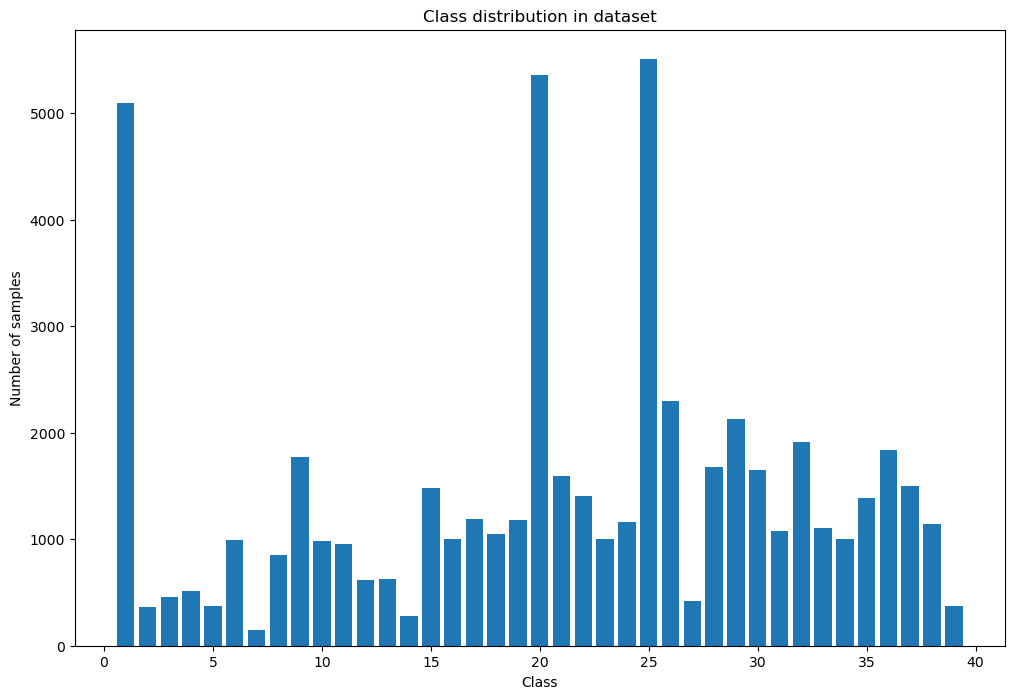

In [5]:
index = np.arange(1, len(data.keys())+1)
plt.figure(figsize=(12, 8))
plt.bar(index, np.array(list(data.values())))
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.savefig('class_distribution.jpg')
plt.show()

In [6]:
# Read the CSV file
#df = pd.read_csv('confusion.csv')
# Calculate the confusion matrix
#confusion = confusion_matrix(df['True'], df['Predicted'])

In [7]:
# Plot the confusion matrix
#plt.figure(figsize=(20, 14))
#sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues')
#plt.title('Confusion Matrix')
#plt.ylabel('True label')
#plt.xlabel('Predicted label')
#plt.show()

In [8]:
def train_val_plot(pathTrain, pathVal, title, stat):
    # Read the CSV file
    dfVal = pd.read_csv(pathVal)
    dfTrain = pd.read_csv(pathTrain)

    plt.figure(figsize=(6, 5))
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(stat)
    plt.plot(dfVal, label='Validation ' + stat)
    plt.plot(dfTrain, label='Training ' + stat)
    plt.legend(ncol=4, bbox_to_anchor=(0.5,-0.5), loc='lower center', edgecolor='w')
    plt.tight_layout()
    plt.savefig(f"{title} - {stat}.png")
    plt.show()

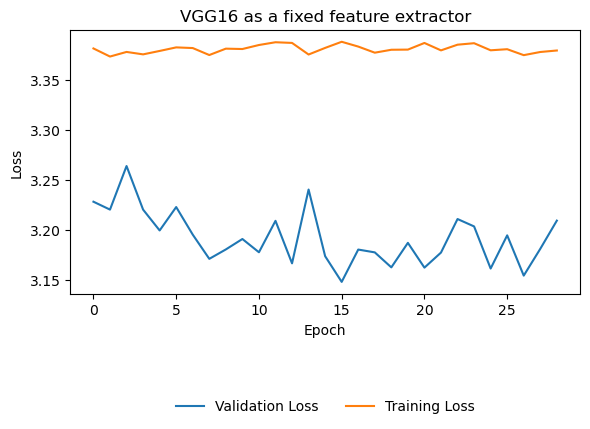

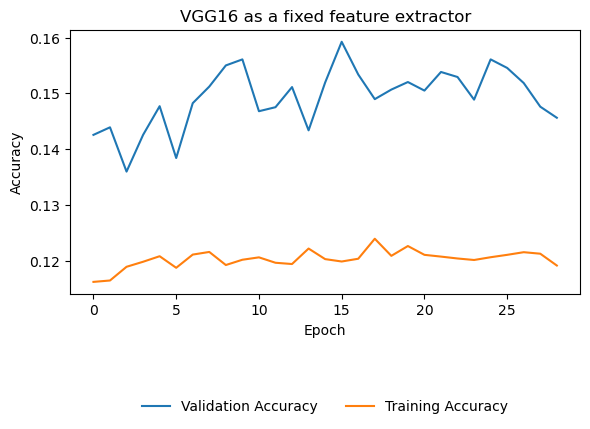

In [9]:
train_val_plot('../scripts/last_layer/train_loss_history.csv', '../scripts/last_layer/val_loss_history.csv', 'VGG16 as a fixed feature extractor', 'Loss')
train_val_plot('../scripts/last_layer/train_acc_history.csv', '../scripts/last_layer/val_acc_history.csv', 'VGG16 as a fixed feature extractor', 'Accuracy')

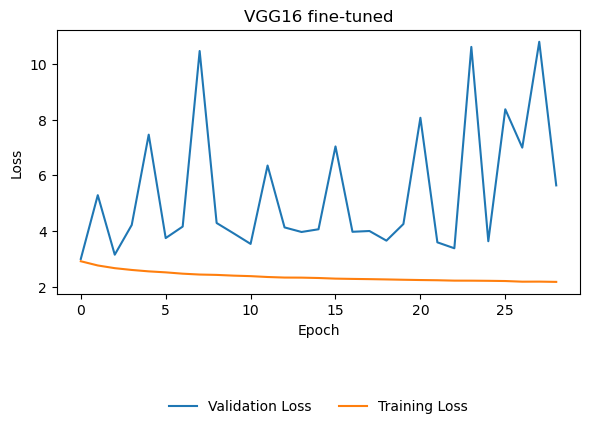

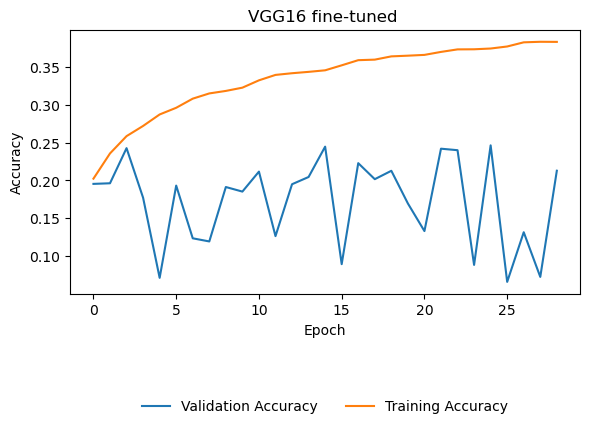

In [10]:
train_val_plot('../scripts/fine_tuning/train_loss_history.csv', '../scripts/fine_tuning/val_loss_history.csv', 'VGG16 fine-tuned', 'Loss')
train_val_plot('../scripts/fine_tuning/train_acc_history.csv', '../scripts/fine_tuning/val_acc_history.csv', 'VGG16 fine-tuned ', 'Accuracy')

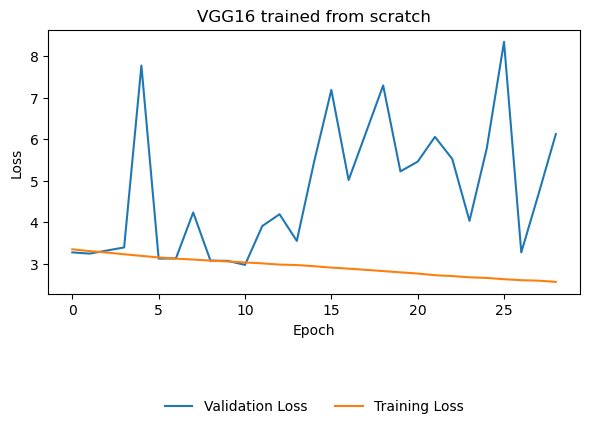

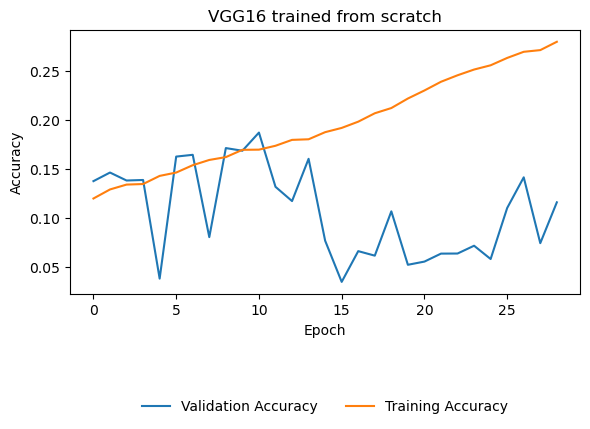

In [11]:
train_val_plot('../scripts/from_scratch/train_loss_history.csv', '../scripts/from_scratch/val_loss_history.csv', 'VGG16 trained from scratch', 'Loss')
train_val_plot('../scripts/from_scratch/train_acc_history.csv', '../scripts/from_scratch/val_acc_history.csv', 'VGG16 trained from scratch', 'Accuracy')